#Import Required Libraries

In [1]:
import pandas as pd
import numpy as np

from math import sqrt, floor
from scipy.spatial import distance
from sklearn.preprocessing import normalize
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans

from sklearn.metrics import silhouette_score
from sklearn.metrics.cluster import v_measure_score
from sklearn.metrics import classification_report

import matplotlib.pyplot as plt

# Process Iris Data

In [2]:
columnNames = ['sLength','sWidth','pLength','pWidth','label']
trainData = pd.read_table("iris.data", delimiter=",", header = None, names = columnNames)
clusterLabel = trainData['label']
del trainData['label']
trainData.head()

,sLength,sWidth,pLength,pWidth
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [3]:
clusterLabel = pd.Categorical(clusterLabel, categories=['Iris-versicolor', 'Iris-setosa', 'Iris-virginica'])
clusterLabel = clusterLabel.codes
clusterLabel

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int8)

In [4]:
pd.DataFrame(clusterLabel).value_counts()

0    50
1    50
2    50
dtype: int64

#K-means Algorithm

In [5]:
#method to find centroids
def findCentroids(inputData,k, random_state):
  np.random.seed(random_state)
  centroids = []
  centroids.append(list(inputData[np.random.randint(inputData.shape[0], size=1)[0]]))
  k = k-1
  while k > 0:
    max_dist = -1
    index = 0
    for i,data in enumerate(inputData):
      ans = 0
      #checking if point already selected
      if list(data) in centroids:
        continue
      for centroid in centroids:
        ans += distance.cosine(data, centroid)
      if ans > max_dist:
        max_dist = ans 
        index = i
    centroids.append(list(inputData[index]))
    k = k-1
  return centroids

In [6]:
def kMeansPredict(data,k,max_iters,random_state):
  #find initial centroids
  centroids = findCentroids(data.to_numpy(),k, random_state)
  # assign initial clusters
  distances = distance.cdist(data, centroids,'cosine')
  clusterLabel = np.array([np.argmin(i) for i in distances])

  #update the centroids for each cluster and update the cluster assignment
  count = 0
  for _ in range(max_iters):
    count+=1
    new_centroids = []

    for i in range(k):
      temp = data.iloc[clusterLabel==i].mean(axis=0)
      new_centroids.append(temp)

    if np.count_nonzero(np.asarray(centroids)-np.asarray(new_centroids)) == 0:
      break
    else:
      centroids = new_centroids
    
    distances = distance.cdist(data, centroids,'cosine')
    clusterLabel = np.array([np.argmin(i) for i in distances]) 
  print("Number of Centroid Updates: ",count) 
  return clusterLabel

Finding appropriate cluster size using silhouette score

In [7]:
# creating the dataset
clusterValues = [2,3,4,5,6,7,8,9,10]
scores = []
for k in clusterValues:
  outputTemp = kMeansPredict(trainData,k,100,42)
  score = silhouette_score(trainData, outputTemp, metric='cosine')
  scores.append(score)
scores

Number of Centroid Updates:  2
Number of Centroid Updates:  8
Number of Centroid Updates:  8
Number of Centroid Updates:  8
Number of Centroid Updates:  6
Number of Centroid Updates:  9
Number of Centroid Updates:  9
Number of Centroid Updates:  8
Number of Centroid Updates:  8


[0.9579554849242644,
 0.7484647230660484,
 0.5747294058244057,
 0.5334575057506074,
 0.5142808423950144,
 0.4484559847105883,
 0.44790131536641314,
 0.4329617491509137,
 0.4498003107164078]

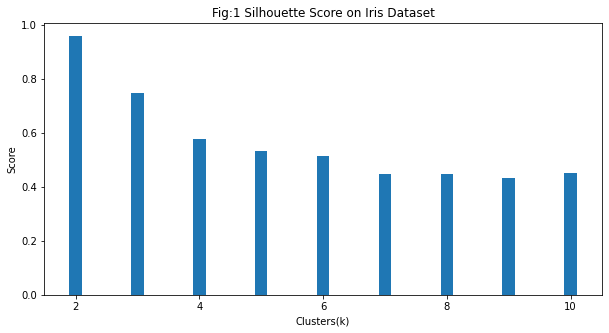

In [8]:
#Plotting the silhoette score against all cluster vlaues
fig = plt.figure(figsize = (10, 5))
plt.title("Fig:1 Silhouette Score on Iris Dataset") 

# creating the bar plot
plt.xlabel('Clusters(k)')
plt.ylabel('Score')
plt.bar(clusterValues,scores, width = 0.2)
plt.show()

In [9]:
#predicting the labels using cluster = 3
outputLabelsCluster3 = kMeansPredict(trainData,3,100,42)
outputLabelsCluster3

Number of Centroid Updates:  8


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [10]:
#predicting the labels using cluster = 2
outputLabelsCluster2 = kMeansPredict(trainData,2,100,42)
outputLabelsCluster2

Number of Centroid Updates:  2


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [11]:
pd.DataFrame(outputLabelsCluster3).value_counts()

2    54
1    50
0    46
dtype: int64

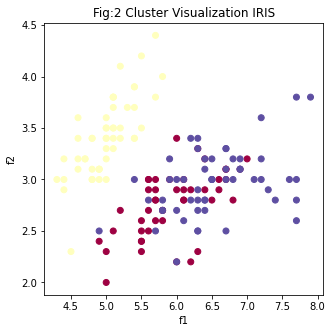

In [32]:
trainDataNumpy = trainData.to_numpy()
plt.subplots(figsize=(5,5))
plt.scatter(x=trainDataNumpy[:,0], y=trainDataNumpy[:,1], c=outputLabelsCluster3, cmap=plt.cm.Spectral)
plt.xlabel('f1')
plt.ylabel('f2');
plt.savefig('final_clusters', bpi=150)
plt.title("Fig:2 Cluster Visualization IRIS")
plt.show() 

In [13]:
kmeanScoreCluster3 = v_measure_score(clusterLabel,outputLabelsCluster3)
kmeanScoreCluster3

0.9143625311853999

In [14]:
kmeanScoreCluster2 = v_measure_score(clusterLabel,outputLabelsCluster2)
kmeanScoreCluster2

0.7336804366512104

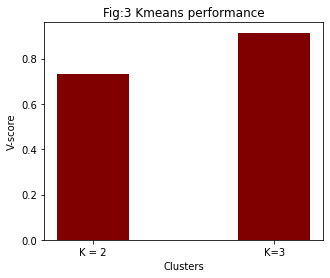

In [31]:
data = {'K = 2':kmeanScoreCluster2, 'K=3':kmeanScoreCluster3}
algorithm = list(data.keys())
score = list(data.values())

fig = plt.figure(figsize = (5, 4))

# creating the bar plot
plt.bar(algorithm, score, color ='maroon',
		width = 0.4)

plt.xlabel("Clusters")
plt.ylabel("V-score")
plt.title("Fig:3 Kmeans performance")
plt.show()

Classification Report

In [16]:
target_names = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']

print(classification_report(clusterLabel,outputLabelsCluster3,target_names=target_names))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      0.92      0.96        50
Iris-versicolor       1.00      1.00      1.00        50
 Iris-virginica       0.93      1.00      0.96        50

       accuracy                           0.97       150
      macro avg       0.98      0.97      0.97       150
   weighted avg       0.98      0.97      0.97       150



# Using sklearn's KMeans library on IRIS Dataset

In [17]:
sklearn_output = KMeans(n_clusters=3, max_iter=100).fit_predict(trainData)
sklearn_output

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1,
       1, 1, 1, 2, 2, 1, 1, 1, 1, 2, 1, 2, 1, 2, 1, 1, 2, 2, 1, 1, 1, 1,
       1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 2], dtype=int32)

In [18]:
sklearnOutput = v_measure_score(clusterLabel,outputLabelsCluster3)
sklearnOutput

0.9143625311853999

[0.9112131312915107, 0.5397478882812209, 0.3805272816600615, 0.3446814975841601, 0.06381322635638924, 0.016366375753364283, 0.005983955629586107, -0.053661580795392634, -0.08508741301751405]


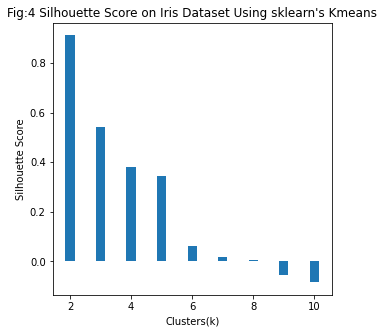

In [33]:
# creating the dataset
clusterSizes = [2,3,4,5,6,7,8,9,10]
scoresDefaultKMeans = []
for k in clusterValues:
  outputTemp = KMeans(n_clusters=k, max_iter=100).fit_predict(trainData)
  tmpScore = silhouette_score(trainData, outputTemp, metric='cosine')
  scoresDefaultKMeans.append(tmpScore)
print(scoresDefaultKMeans)

#Plotting the silhoette score against all cluster vlaues
fig = plt.figure(figsize = (5, 5))
plt.title("Fig:4 Silhouette Score on Iris Dataset Using sklearn's Kmeans") 

# creating the bar plot
plt.xlabel('Clusters(k)')
plt.ylabel('Silhouette Score')
plt.bar(clusterSizes,scoresDefaultKMeans, width = 0.3)
plt.show()

#Plotting graph of VScore of Implemented KMeans vs sklearn Kmeans on iris dataset

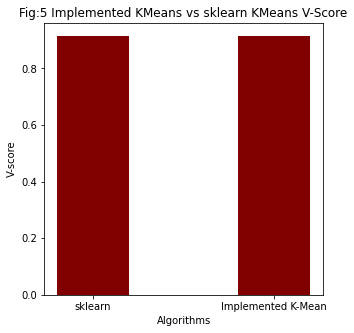

In [34]:
data = {'sklearn':sklearnOutput, 'Implemented K-Mean': kmeanScoreCluster3}
algorithm = list(data.keys())
score = list(data.values())

fig = plt.figure(figsize = (5, 5))

# creating the bar plot
plt.bar(algorithm, score, color ='maroon',
		width = 0.4)

plt.xlabel("Algorithms")
plt.ylabel("V-score")
plt.title("Fig:5 Implemented KMeans vs sklearn KMeans V-Score")
plt.show()

# Preprocessing MNIST Dataset

In [21]:
testData = pd.read_table('testMNIST.txt', header = None, names = ["features"])
testData

,features
0,"0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,..."
1,"0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,..."
2,"0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,..."
3,"0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,..."
4,"0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,..."
...,...
10735,"0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,..."
10736,"0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,..."
10737,"0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,..."
10738,"0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,..."


In [22]:
#testDataInput = pd.read_table("image_test.txt", header = None, names = ["features"])
testData = testData.features.str.split(pat=',', expand=True).astype(int)
testData

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10735,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10736,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10737,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10738,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [23]:
# Data Normalization
testDataNormalized = normalize(testData)
testDataNormalized

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [51]:
# Dimensionality Reduction 
testDataReduced = TSNE(learning_rate='auto', init='random', n_components= 3).fit_transform(testDataNormalized)
testDataReduced

array([[ 15.521198  ,   1.7634227 ,   8.340276  ],
       [-11.645742  ,   6.598971  ,   2.382526  ],
       [-20.109657  ,   2.70515   ,   6.6506925 ],
       ...,
       [ -0.47016567, -23.559523  ,  -6.479485  ],
       [  9.942581  , -12.272191  ,  16.266275  ],
       [  9.68748   ,   8.165967  ,  18.016129  ]], dtype=float32)

In [52]:
testDataFrame = pd.DataFrame(testDataReduced)
testDataFrame

,0,1,2
0,15.521198,1.763423,8.340276
1,-11.645742,6.598971,2.382526
2,-20.109657,2.705150,6.650692
3,-9.608017,-6.012485,-16.448494
4,-19.809820,-2.392588,-3.401932
...,...,...,...
10735,11.614943,-10.316996,16.421707
10736,22.174141,3.615590,1.209511
10737,-0.470166,-23.559523,-6.479485
10738,9.942581,-12.272191,16.266275


# Predict and Analyze MNIST data


In [37]:
outputMNIST = kMeansPredict(testDataFrame, 10, 100,27)
outputMNIST

Number of Centroid Updates:  31


array([1, 9, 9, ..., 0, 6, 3])

Writing output to file output.txt

In [27]:
sentimentFileWriter = open("output.txt", "w")
sentimentFileWriter.writelines("%s\n" % sentiment for sentiment in outputMNIST)
sentimentFileWriter.close()

Analyzing MNIST data predictions with different cluster size


In [53]:
# creating the dataset
clusterSizeMNIST = [2,4,6,8,10,12,14,16,18,20]
scoresMNIST = []
for k in clusterSizeMNIST:
  outputLabels = kMeansPredict(testDataFrame,k,100, 27)
  tmpScore = silhouette_score(testDataReduced, outputLabels, metric='cosine')
  scoresMNIST.append(tmpScore)
scoresMNIST

Number of Centroid Updates:  16
Number of Centroid Updates:  41
Number of Centroid Updates:  39
Number of Centroid Updates:  25
Number of Centroid Updates:  37
Number of Centroid Updates:  40
Number of Centroid Updates:  44
Number of Centroid Updates:  43
Number of Centroid Updates:  33
Number of Centroid Updates:  56


[0.46479428,
 0.5193951,
 0.5726078,
 0.635963,
 0.62666386,
 0.58613515,
 0.56339055,
 0.56358624,
 0.5437955,
 0.5437723]

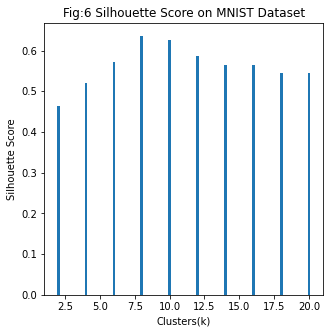

In [54]:
#Plotting the silhoette score against all cluster vlaues
fig = plt.figure(figsize = (5, 5))
plt.title("Fig:6 Silhouette Score on MNIST Dataset") 

# creating the bar plot
plt.xlabel('Clusters(k)')
plt.ylabel('Silhouette Score')
plt.bar(clusterSizeMNIST,scoresMNIST, width = 0.2)
plt.show()

In [ ]:
plt.subplots(figsize=(9,6))
plt.scatter(x=testDataReduced[:,0], y=testDataReduced[:,1], 
            c=outputMNIST, cmap=plt.cm.Spectral);
plt.xlabel('f1')
plt.ylabel('f2');
plt.savefig('final_clusters', bpi=150)
plt.title("Fig:7 Cluster Visualization MNIST")
plt.show() 